In [6]:
from pynwb import NWBHDF5IO

test_file = 'KatoEtAl2018.WT_Stim.5.nwb'
nwbfile_io = NWBHDF5IO(test_file, 'r')
nwbfile = nwbfile_io.read()
print('Loaded: %s'%test_file)


Loaded: KatoEtAl2018.WT_Stim.5.nwb


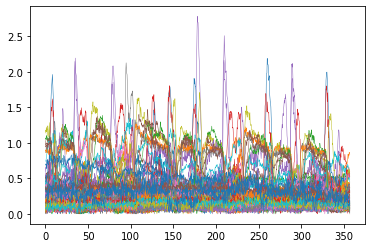

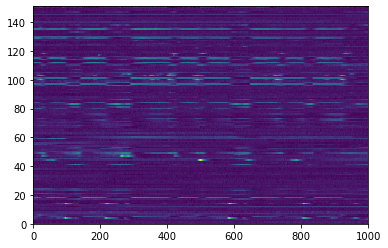

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy

tr_fig, tr_ax = plt.subplots()
all_traces = None

for acq in nwbfile.acquisition.values():
    if 'traces corrected' in acq.description and 'e' in acq.description:
        cell = acq.description.split(': ')[-1]
        #print('Time series: %s'%(acq.description))
        ca = acq.data[:1000]
        times = acq.timestamps[:1000]
        tr_ax.plot(times, ca, lw=.5, label='%s'%cell)
        #print(ca)
        if all_traces is None:
            all_traces = numpy.array([ca])
        else:
            all_traces = numpy.concatenate((all_traces,[ca]), axis=0)
#print(2233333)      
#print(all_traces)
#plt.legend()

hm_fig, hm_ax = plt.subplots()
hm_ax.pcolormesh(all_traces)
plt.show()